In [49]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy import interpolate,special
from sklearn import preprocessing
from statistics import median

In [6]:
E_square_hubble=[]
H=[]
z_hubble=[]
err_H=[]
wa=0
h0=68

with open("data_hubble.dat") as f:
    f.readline()
    f.readline()
    for x in f:
        x=x.split()
        z_hubble.append(float(x[0]))
        H.append(float(x[1]))
        err_H.append(float(x[2]))
        E_square_hubble.append((float(x[1])/h0)**2)

In [17]:
E_square_sn=[]
E_sn=[]
z_sn=[]
err_sn=[]
corr_matrix=[]
with open("data_pantheon.dat") as f:
    f.readline()
    for x in f:
        x=x.split()
        z_sn.append(float(x[0]))
        err_sn.append(float(x[2]))
        E_sn.append(1/float(x[1]))
        E_square_sn.append(float(x[1])**(-2))
        corr_matrix.append(x[3:len(x)+1])
corr_matrix=np.array(corr_matrix)
corr_matrix=corr_matrix.astype(float)


In [18]:
N_hubble=len(z_hubble)
N_sn=len(z_sn)

## Data analysis


The standard likelihood analysis we will follow is a gaussian one defined as,
$$
\mathcal{L}(p)\propto \exp\left(-\frac{1}{2}\chi^2(p)\right)
$$
and as the data we will be using is from low-redshift supernovae and Hubble, as these two are independent, the chi-square is, $\chi^2=\chi^2_{\text{H}}+\chi^2_{\text{SN}}$

To simplify we will be using a re-scaled Hubble parameter, which we define as,
$$
E(z)=\frac{H(z)}{H_0},
$$
and for the supernovae we will be using the Pantheon catalogue of Type Ia in it's covariance matrix. The chi-square for the supernovae can be written as \cite{stat.pdf},
$$
\chi^2_{\text{SN}}(p)=\sum_{i,j}(E_{\text{obs},i}-E_{\text{model},i}(p))C^{-1}_{i,j}(E_{\text{obs},j}-E_{\text{model},j}(p))
$$
where $C$ is the covariance matrix, and is defined as, $C_{i,j}=\langle(E_{\text{obs},i}-E_{\text{model},i}(p))(E_{\text{obs},j}-E_{\text{model},j}(p))\rangle_p$, and $p$ are the free parameters.



For the Hubble data we will use a total of 38 measurements up to a redshift of $z\sim 2.36$. And so the measures are indenpendent and therefore the convariance matrix trivial. but we need to analyse the values in terms of $E(z)$, and to combine the two datasets, pantheon and Hubble, we need to marginalize over the value of the Hubble constant, $H_0$, to get the chi-square and therefore the likelihood. 

We will follow a procedure from \cite{1709.02356.pdf}, first as we said previously the Hubble dataset has a simple incarnation for the chi-square,
$$
\chi^2_{H}(p)=\sum_i w_i[H_i-H_{\text{model},i}(p)]^2
$$
and it's minimum is 
$$
\begin{align}
\chi^2_{H}(p)&=\sum_i \dfrac{1}{\sigma_i^2}[H_i-H_{\text{model},i}(p)]^2=\sum_i \dfrac{1}{\sigma_i^2}\left[H_i^2-2H_iH_{\text{model},i}(p)+H_{\text{model},i}^2(p)\right]\\
&=\sum_i \dfrac{1}{\sigma_i^2}\left[H_i^2-2H_iH_0E_{\text{model},i}(p)+H_0^2E_{\text{model},i}^2(p)\right]\\
&=\Gamma-2BH_0+AH_0^2
\end{align}
$$
where 
$$
\Gamma=\sum_i \dfrac{H_i^2}{\sigma_i^2} \\
B=\sum_i \dfrac{H_iE_{\text{model},i}(p)}{\sigma_i^2}\\
A=\sum_i \dfrac{E_{\text{model},i}^2(p)}{\sigma_i^2}
$$
Also in cosmology the data maybe the gaussianly distributed and still the chi-square and likelihood maybe give different results. This happens because the normalization factor in the likelihood is neglected in some cases, where the covariance matrix depends on the model used. Therefore if the covariance matrix depends on the model we can't drop the normalization factor and if it doesn't depend we drop the factor. We will assume it depends.
The likelihood is thus given by,
$$
\mathcal{L}(\text{D}|\text{M},p)=\frac{1}{(2\pi)^{N/2}|det(C)|^{1/2}}\exp\left[-\frac{1}{2}(\Gamma-2BH_0+AH_0^2)\right]
$$
Knowing that the Bayes's theorem for 3 events is,
$$
P(A|B,C)=\frac{P(A,B,C)}{P(B,C)}=\frac{P(B|A,C)P(A,C)}{P(B|C)P(C)}=\frac{P(B|A,C)P(A|C)P(C)}{P(B|C)P(C)}=\frac{P(B|A,C)P(A|C)}{P(B|C)}
$$
Thus knowing this and marginalizing over $H_0$, from $[0,+\infty[$, and setting $P(p'|\text{M},H_0)=1$
$$
\begin{align}
P(p'|\text{D},\text{M})&=\frac{P(\text{D}|\text{M},p')}{P(\text{D}|\text{M})}=\frac{1}{P(\text{D}|\text{M})}\int_0^{\infty} dH_0 \mathcal{L}(\text{D}|\text{M},p)= \frac{1}{P(\text{D}|\text{M})}\int_0^{\infty} dH_0 \left( \frac{1}{(2\pi)^{N/2}|det(C)|^{1/2}}\exp\left[-\frac{1}{2}(\Gamma-2BH_0+AH_0^2)\right] \right) \\
&=  \frac{1}{(2\pi)^{N/2}|det(C)|^{1/2}}\frac{1}{P(\text{D}|\text{M})}\int_0^{\infty} dH_0 \left(\exp\left[-\frac{1}{2}(\Gamma-2BH_0+AH_0^2)\right] \right) \\
&= \frac{1}{(2\pi)^{N/2}|det(C)|^{1/2}} \frac{1}{P(\text{D}|\text{M})}\int_0^{\infty} dH_0 \left(\exp\left[-\frac{1}{2}\left(\Gamma-\frac{B^2}{A}+A(H_0-B/A)^2\right)\right] \right)\\
&= \frac{1}{(2\pi)^{N/2}|det(C)|^{1/2}} \frac{1}{P(\text{D}|\text{M})}\exp\left[-1/2\left(\Gamma-\frac{B^2}{A}\right)\right]\int_{-B/A}^{\infty} dy \left(\exp\left[-\frac{Ay^2}{2}\right] \right) \\
&= \frac{1}{(2\pi)^{N/2}|det(C)|^{1/2}} \frac{1}{P(\text{D}|\text{M})}\exp\left[-1/2\left(\Gamma-\frac{B^2}{A}\right)\right] \sqrt{\frac{\pi}{2A}}\left[ 1+erf\left(\frac{B}{\sqrt{2A}}\right)\right]
\end{align}
$$
where $erf(x)=\frac{2}{\sqrt{\pi}}\int_0^x dy \exp(-y^2)$ is the error function.
And now it's time to get the chi-square marginalized, $\overline{\chi}^2_{\text{H}}=-2\ln(P(p'|\text{D},\text{M})P(\text{D}|\text{M}))$, given by,
$$
\overline{\chi}^2_{\text{H}}=-\ln\left(\frac{1}{(2\pi)^N|det(C)|}\frac{\pi}{2}\right) + \left(\Gamma-\frac{B^2}{A}\right) + \ln(A)-2\ln\left[ 1+erf\left(\frac{B}{\sqrt{2A}}\right)\right]
$$



In [19]:
def Model(w0,omegam,z,wa):
    E_square=omegam*(1+z)**3+(1-omegam)*(1+z)**(3*(1+w0+wa))*np.exp(-3*wa*z/(1+z))
    return np.sqrt(E_square)

## Confidence Regions

### Determine $\chi^2$

In [20]:
##Hubble
w0=np.linspace(-2,0,100)
omega_m=np.linspace(0.05,0.5,len(w0))
E_model=np.zeros(len(w0))
chisquare_hubble=np.zeros((len(w0),len(w0)))
min_chi_hubble=9999999999

for j in range(len(w0)):
    w_0=w0[j]
    for k in range(len(omega_m)):
        Gamma=0
        B=0
        A=0
        omegam=omega_m[k]
        for i in range(N_hubble):
            E_model=Model(w_0,omegam,z_hubble[i],wa)
            Gamma+=(H[i]/err_H[i])**2
            B+=E_model*H[i]/err_H[i]**2
            A+=E_model**2/err_H[i]**2
        chis=Gamma-B**2/A+np.log(A)-2*np.log(1+mt.erf(B/np.sqrt(2*A)))
        chisquare_hubble[j,k]=chis
        if min_chi_hubble>chisquare_hubble[j,k]:
            min_chi_hubble=chisquare_hubble[j,k]

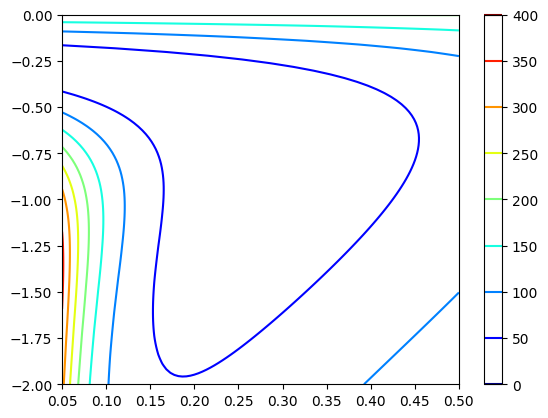

In [21]:
plt.contour(omega_m,w0,chisquare_hubble,origin="lower")
plt.jet()
plt.colorbar()
plt.show()

In [22]:
print(min_chi_hubble)

19.184360647306143


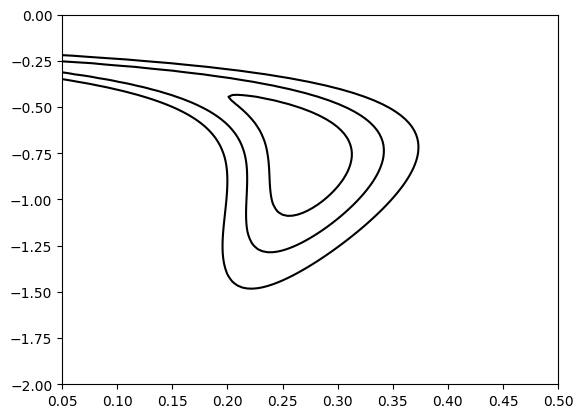

In [23]:
sigma=[0,2.30,6.17,11.8]
sigma_hubble=np.zeros((len(w0),len(w0)))
for i in range(len(w0)):
    for j in range(len(omega_m)):
        sigma_hubble[i,j]=(chisquare_hubble[i,j]-min_chi_hubble)
plt.contour(omega_m,w0,sigma_hubble,sigma,colors="black")

plt.show()

In [24]:
cov_matrix=np.zeros((N_sn,N_sn))
for i in range(N_sn):
    for j in range(N_sn):
        cov_matrix[i,j]=corr_matrix[i,j]*err_sn[i]*err_sn[j]

In [25]:
##Type Ia
w0=np.linspace(-2,0,100)
E_model=np.zeros(len(w0))
omega_m=np.linspace(0.05,0.5,len(w0))
chisquare_sn=np.zeros((len(w0),len(w0)))
#delta_chisquare_sn=np.zeros((len(w0),len(w0)))
#likelihood_sn=np.zeros((len(w0),len(w0)))
inv_cov=np.linalg.inv(cov_matrix)
min_chi_sn=9999999999
for k in range(len(w0)):
    w_0=w0[k]
    for t in range(len(omega_m)):
        chisquare_ij=0
        omegam=omega_m[t]
        for i in range(N_sn):
            E_model_i=Model(w_0,omegam,z_sn[i],wa)
            for j in range(N_sn):
                E_model_j=Model(w_0,omegam,z_sn[j],wa)
                chisquare_ij+=(1/E_sn[i]-1/E_model_i)*inv_cov[i,j]*(1/E_sn[j]-1/E_model_j)
        chisquare_sn[k,t]=chisquare_ij
        if min_chi_sn>chisquare_sn[k,t]:
            min_chi_sn=chisquare_sn[k,t]

In [26]:
print(min_chi_sn)

6.712447294419059


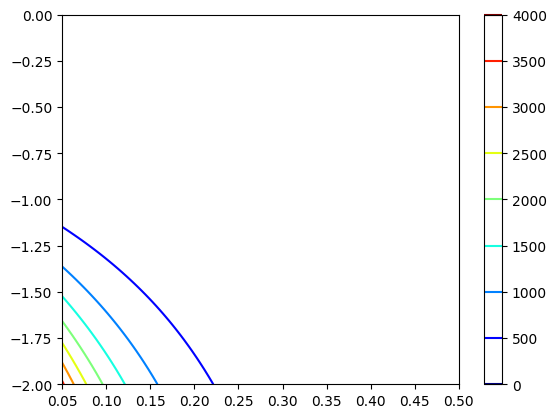

In [27]:
plt.contour(omega_m,w0,chisquare_sn,origin="lower")
plt.jet()
plt.colorbar()
plt.show()

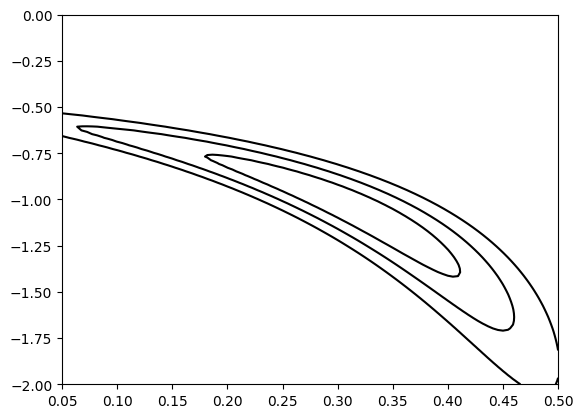

In [28]:
sigma=[0,2.30,6.17,11.8]
sigma_sn=np.zeros((len(w0),len(w0)))
for i in range(len(w0)):
    for j in range(len(omega_m)):
        sigma_sn[i,j]=(chisquare_sn[i,j]-min_chi_sn)
plt.contour(omega_m,w0,sigma_sn,sigma,colors="black")
plt.show()

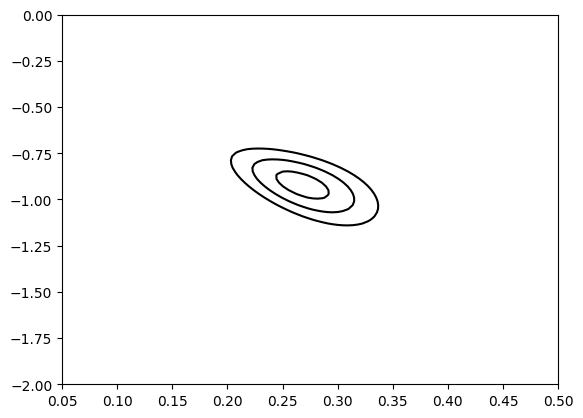

In [29]:
chi_square_joint=chisquare_hubble+chisquare_sn
sigma=[0,2.30,6.17,11.8]
sigma_joint=np.zeros((len(w0),len(w0)))
for i in range(len(w0)):
    for j in range(len(omega_m)):
        sigma_joint[i,j]=(chi_square_joint[i,j]-min_chi_hubble-min_chi_sn)
plt.contour(omega_m,w0,sigma_joint,sigma,colors="black")

plt.show()

In [30]:
threshold_3sigma = 11.8

# Initialize lists to store parameter values for the 3σ confidence level
params_3sigma = []

# Iterate through the sigma_joint array and check if the values meet the 3σ threshold
for i in range(len(w0)):
    for j in range(len(omega_m)):
        delta_chi_squared = sigma_joint[i, j]
        if delta_chi_squared <= threshold_3sigma:
            params_3sigma.append((omega_m[j], w0[i]))



max_omega_m = max(params_3sigma, key=lambda x: x[0])
min_omega_m = min(params_3sigma, key=lambda x: x[0])
max_w0 = max(params_3sigma, key=lambda x: x[1])
min_w0 = min(params_3sigma, key=lambda x: x[1])

# Calculate average values
avg_omega_m = sum([x[0] for x in params_3sigma]) / len(params_3sigma)
avg_w0 = sum([x[1] for x in params_3sigma]) / len(params_3sigma)

# Print the results
print("Maximum Omega_m:", max_omega_m[0])
print("Minimum Omega_m:", min_omega_m[0])
print("Maximum w0:", max_w0[1])
print("Minimum w0:", min_w0[1])
print("Average Omega_m:", avg_omega_m)
print("Average w0:", avg_w0)

Maximum Omega_m: 0.33636363636363636
Minimum Omega_m: 0.20454545454545453
Maximum w0: -0.7272727272727271
Minimum w0: -1.1313131313131313
Average Omega_m: 0.2720678285445124
Average w0: -0.9276704872559866


In [31]:

threshold_1sigma = 2.30

# Initialize lists to store parameter values for the 3σ confidence level
params_1sigma = []

# Iterate through the sigma_joint array and check if the values meet the 3σ threshold
for i in range(len(w0)):
    for j in range(len(omega_m)):
        delta_chi_squared = sigma_joint[i, j]
        if delta_chi_squared <= threshold_1sigma:
            params_1sigma.append((omega_m[j], w0[i]))


max_omega_m_1sigma = max(params_1sigma, key=lambda x: x[0])
min_omega_m_1sigma = min(params_1sigma, key=lambda x: x[0])
max_w0_1sigma = max(params_1sigma, key=lambda x: x[1])
min_w0_1sigma = min(params_1sigma, key=lambda x: x[1])

# Calculate average values for 1σ
avg_omega_m_1sigma = sum([x[0] for x in params_1sigma]) / len(params_1sigma)
avg_w0_1sigma = sum([x[1] for x in params_1sigma]) / len(params_1sigma)

# Sort the parameter values in params_1sigma by omega_m and w0 separately for median calculation
params_1sigma_sorted_by_omega_m = sorted(params_1sigma, key=lambda x: x[0])
params_1sigma_sorted_by_w0 = sorted(params_1sigma, key=lambda x: x[1])

# Calculate the median values for 1σ
median_omega_m_1sigma = params_1sigma_sorted_by_omega_m[len(params_1sigma_sorted_by_omega_m) // 2]
median_w0_1sigma = params_1sigma_sorted_by_w0[len(params_1sigma_sorted_by_w0) // 2]

# Print the results for 1σ
print("deviation from the mean Omega (1σ):", abs(avg_omega_m_1sigma-max_omega_m_1sigma[0]))
print("deviation from the mean Omega (1σ):", abs(avg_omega_m_1sigma-min_omega_m_1sigma[0]))
print("Maximum w0 (1σ):", abs(avg_w0_1sigma-max_w0_1sigma[1]))
print("Minimum w0 (1σ):", abs(avg_w0_1sigma-min_w0_1sigma[1]))
print("Average Omega_m (1σ):", avg_omega_m_1sigma)
print("Average w0 (1σ):", avg_w0_1sigma)

deviation from the mean Omega (1σ): 0.022263450834879406
deviation from the mean Omega (1σ): 0.023191094619666064
Maximum w0 (1σ): 0.07462378890950272
Minimum w0 (1σ): 0.06679035250463872
Average Omega_m (1σ): 0.2686456400742115
Average w0 (1σ): -0.9231086373943511


Text(0, 0.5, '$w_0$')

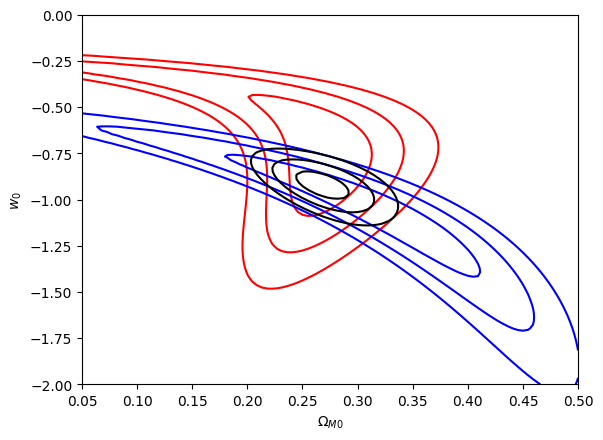

In [32]:
plt.contour(omega_m,w0,sigma_hubble,sigma,colors="red")
plt.contour(omega_m,w0,sigma_sn,sigma,colors="blue")
plt.contour(omega_m,w0,sigma_joint,sigma,colors="black")
plt.xlabel(r"$\Omega_{M0}$")
plt.ylabel(r"$w_0$")

In [56]:
def min_max_scaling(data):
    min_val = min(data)
    max_val = max(data)
    
    normalized_data = [(x - min_val) / (max_val - min_val) for x in data]
    
    return normalized_data


In [57]:
lik_h=np.exp(-chisquare_hubble/2)
lik_sn=np.exp(-chisquare_sn/2)
lik_j=np.exp(-chi_square_joint/2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

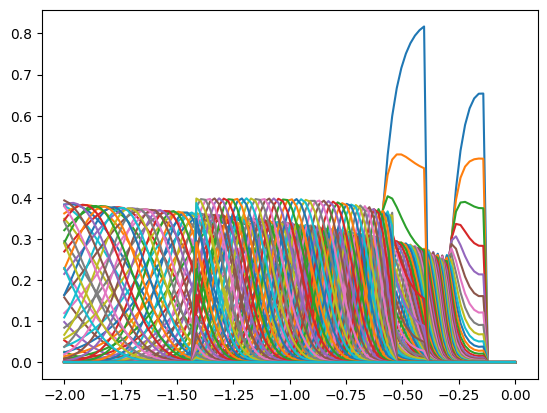

In [51]:
plt.plot(w0,lik_h)
plt.plot(w0,lik_sn)
plt.plot(w0,lik_j)

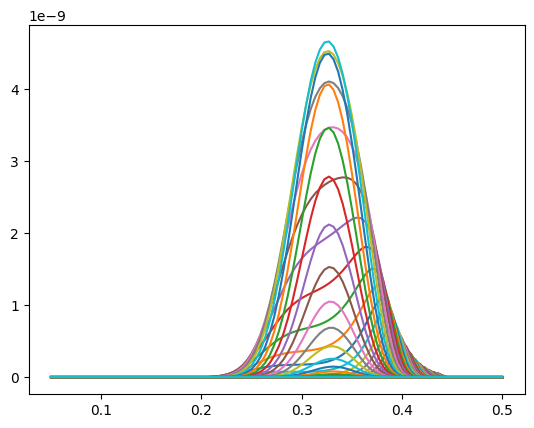

In [43]:
plt.plot(omega_m,lik)

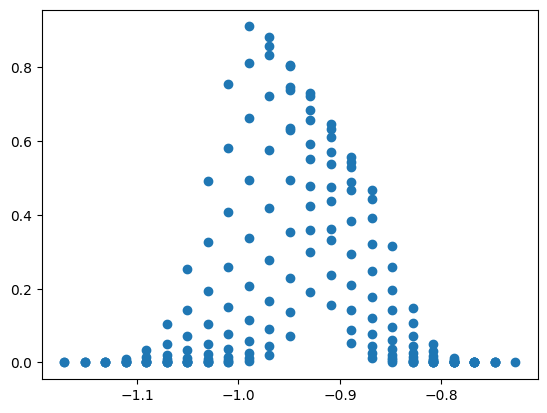

In [ ]:
threshold_1sigma = 11.80
L_w0 = []
lik_joint=[]
lik_hubble=[]
lik_pant=[]
for i in range(len(w0)):
    for j in range(len(omega_m)):
        delta_chi_squared_joint = sigma_joint[i, j]
        delta_chi_squared_hubble=sigma_hubble[i,j]
        delta_chi_squared_pant=sigma_sn[i,j]
        if min_omega_m_1sigma[0]<=omega_m[j]<=max_omega_m_1sigma[0] and delta_chi_squared_pant <= threshold_1sigma:
            lik_joint.append(np.exp(-delta_chi_squared_joint))
            lik_hubble.append(np.exp(-delta_chi_squared_hubble))
            lik_pant.append(np.exp(-delta_chi_squared_pant))
            L_w0.append(w0[i])
plt.scatter(L_w0,lik_pant)

Text(0, 0.5, '$\\mathcal{L}$')

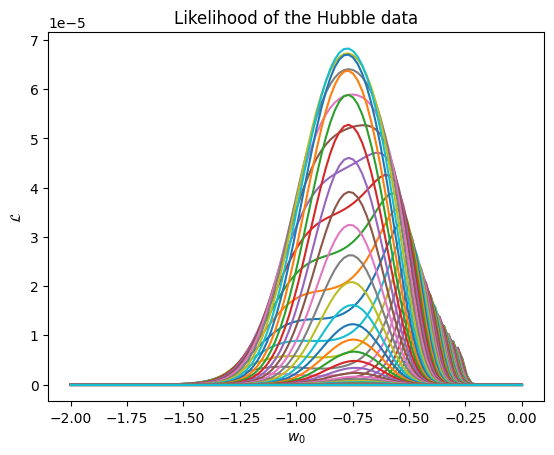

In [ ]:
##Hubble
likelihood_hubble=np.zeros((len(w0),len(w0)))
omegam_sigma_pos=[]
for i in range(len(w0)):
    omegam_sigma_pos_i=[]
    for j in range(len(w0)):
        likelihood_hubble[i,j]=mt.exp(-0.5*chisquare_hubble[i,j])
        if sigma_hubble[i,j]<=sigma[-1]:
            omegam_sigma_pos_i.append(j)
    omegam_sigma_pos.append(omegam_sigma_pos_i)

for i in range(len(omegam_sigma_pos)):
    plt.plot(w0,likelihood_hubble[:,i])
plt.title("Likelihood of the Hubble data")
plt.xlabel(r"$w_0$")
plt.ylabel(r"$\mathcal{L}$")

## Methods

The CPL model, has the following form,
$$
w(z)=\frac{p(z)}{\rho(z)}=w_0+w_a\frac{z}{1+z}
$$
where $w_0$ is the present value, and $w_a$ is the possible redshift evolution. but take note this is a phenomenological approach, and so it doesn't try to mimic dark energy models, but tries to describe a departures from the $\Lambda\text{CDM}$ behaviours. And therefore we set $w_0=-1$ and $w_a=0$, we shall follow a flat FLRW model, in which the Friedmann equation, 
$$
\begin{align}
&\frac{d\rho}{dt}=-3H(\rho+p)=-3H\rho(1+w)=-3\frac{\dot{a}}{a}(\rho+p)=-3\frac{1}{a}\frac{da}{dt}\rho\left(1+w(z)\right)\Leftrightarrow\\
&\Leftrightarrow\frac{d\rho}{\rho}=3\frac{dz}{1+z}\left(1+w(z)\right)
\Leftrightarrow \ln(\rho)-\ln(\rho_0)=3\int_0^z \frac{1+w(z')}{1+z'}dz'=3\int_0^z \frac{1+w_0+w_a\frac{z'}{1+z'}}{1+z'}dz'\\
&=3(1+w_0)\int_0^z \frac{1}{1+z'}+3w_a\int_0^z\frac{z'}{(1+z')^2}dz'=3(1+w_0)\ln(1+z)+3w_a\left(\ln(1+z)+\frac{1}{1+z}-1\right)\\
&=\ln(1+z)^{3(1+w_0+w_a)}+3w_a\left(\frac{-z}{1+z}\right)=\ln(1+z)^{3(1+w_0+w_a)}+\left(\frac{-3w_az}{1+z}\right)\Leftrightarrow \\
&\Leftrightarrow \rho=\rho_0(1+z)^{3(1+w_0+w_a)}\exp\left(\frac{-3w_az}{1+z}\right)
\end{align} 
$$


And so we have that the re-scaled Friedmann equation is given by,
$$
\begin{align}
E^2(z)&=\left(\frac{H(z)}{H_0}\right)^2=\frac{\rho_m+\rho_\Lambda}{\rho_{c0}}=\frac{\rho_{m0}(1+z)^3+\rho_{\Lambda 0}(1+z)^{3(1+w_0+w_a)}\exp\left(\frac{-3w_az}{1+z}\right)}{\rho_{c0}}\\
&=\Omega_{m0}(1+z)^3+\Omega_{\Lambda 0}(1+z)^{3(1+w_0+w_a)}\exp\left(\frac{-3w_az}{1+z}\right)\\
&=\Omega_{m0}(1+z)^3+(1-\Omega_{m0})(1+z)^{3(1+w_0+w_a)}\exp\left(\frac{-3w_az}{1+z}\right)
\end{align}
$$ 



### Determine the $\chi^2$ and $\mathcal{L}$

Text(0, 0.5, '$\\mathcal{L}$')

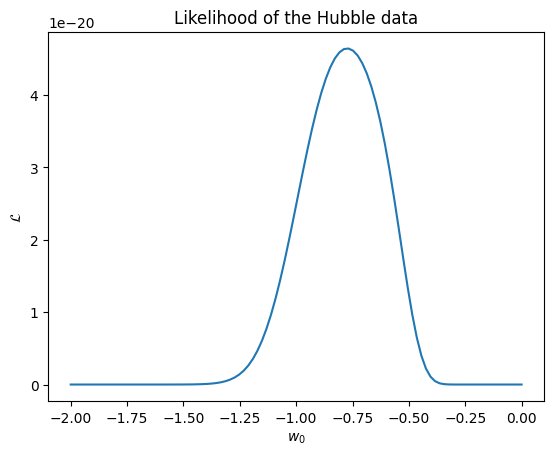

In [ ]:
##Hubble
omega_m=0.27
E_model=np.zeros(len(w0))
chisquare_hubble=np.zeros(len(w0))
delta_chisquare_hubble=np.zeros(len(w0))
likelihood_hubble=np.zeros(len(w0))
for j in range(len(w0)):
    Gamma=0
    B=0
    A=0
    w_0=w0[j]
    for i in range(N_hubble):
        E_model=Model(w_0,omega_m,z_hubble[i],wa)
        Gamma+=(H[i]/err_H[i])**2
        B+=E_model*H[i]/err_H[i]**2
        A+=E_model**2/err_H[i]**2
    chis=Gamma-B**2/A+log(A)-2*mt.log(1+erf(B/sqrt(2*A))) #-mt.log(np.pi/(2*np.pi)**len(z_hubble)*0.5)+
    chisquare_hubble[j]=chis
    likelihood_hubble[j]=1/(2*np.pi)**(len(z_hubble)/2)*mt.exp(-0.5*chisquare_hubble[j])
plt.plot(w0,likelihood_hubble)
plt.title("Likelihood of the Hubble data")
plt.xlabel(r"$w_0$")
plt.ylabel(r"$\mathcal{L}$")

### Determine $\mathcal{L}$

In [ ]:
##Type Ia
omega_m=0.27
E_model=np.zeros(len(w0))
chisquare_sn=np.zeros(len(w0))
delta_chisquare_sn=np.zeros(len(w0))
likelihood_sn=np.zeros(len(w0))
inv_corr=np.linalg.inv(corr_matrix)

Text(0, 0.5, '$\\mathcal{L}$')

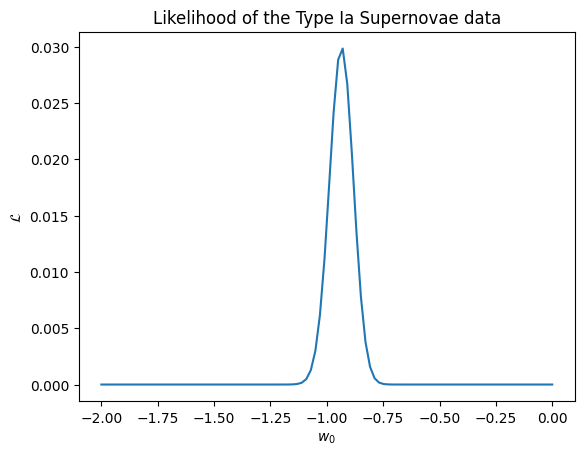

In [ ]:

for k in range(len(w0)):
    w_0=w0[k]
    chisquare_ij=0
    for i in range(N_sn):
        E_model_i=Model(w_0,omega_m,z_sn[i],wa)
        for j in range(N_sn):
            E_model_j=Model(w_0,omega_m,z_sn[j],wa)
            chisquare_ij+=(1/E_sn[i]-1/E_model_i)*inv_cov[i,j]*(1/E_sn[j]-1/E_model_j)
    chisquare_sn[k]=chisquare_ij
    likelihood_sn[k]=mt.exp(-0.5*chisquare_sn[k]) #1/(2*np.pi)**(len(z_sn)/2)
plt.plot(w0,likelihood_sn)
plt.title("Likelihood of the Type Ia Supernovae data")
plt.xlabel(r"$w_0$")
plt.ylabel(r"$\mathcal{L}$")